In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the different datasets

In [2]:
# Data punctualite per train type
df_punc_per_train_type = pd.read_csv("../data/data_punctualite_per_train_type.csv", sep = ";")

# Data delays allocation per month
df_delays_alloc_per_month = pd.read_csv("../data/delays_allocation_per_month.csv", sep = ";")

# Data incidents with impact on punctuality.csv
df_incident_impact_punc = pd.read_csv("../data/incidents_with_impact_on_punctuality.csv", sep = ";")

# Data nationale punctuality based on canceled train
df_nat_punc_based_cancel = pd.read_csv("../data/nationale_punctuality_based_on_canceled_train.csv", sep = ";")

# Data national punctuality per month
df_nat_punc_per_month = pd.read_csv("../data/national_punctuality_per_month.csv", sep = ";")

# Data punctuality d-1
df_punc_d_1 = pd.read_csv("../data/punctuality_d-1.csv", sep = ";")

# Data punctuality per train type and per moment
df_punc_per_train_type_moment = pd.read_csv("../data/punctuality_per_train_type_and_per_moment.csv", sep = ";")

# Data punctualite TGV
df_punc_tgv = pd.read_csv("../data/punctuality_tgv.csv", sep = ";")

# Data punctuality train arrived_bxl per moment
df_punc_train_bxl = pd.read_csv("../data/punctuality_train_arrived_bxl_per_moment.csv", sep = ";")

# Data punctuality train arrived bxl per moment and long line
df_punc_train_bxl_per_moment_longline = pd.read_csv("../data/punctuality_train_arrived_bxl_per_moment_and_long_line.csv", sep = ";")

# Data punctuality train ICE
df_punc_train_ice = pd.read_csv("../data/punctuality_train_ICE.csv", sep = ";")

# Data distance station to station
df_dist_btw_stat = pd.read_csv("../data/subdataset/distance_station_to_station.csv", sep = ";")

# Data Monthly correspondence 
df_monthly_corresp = pd.read_csv("../data/subdataset/monthly_correspondence_data.csv", sep = ";")

## The data is present only for one day

In [3]:
df_punc_d_1

,Date de départ,Numéro du train,Relation,Opérateur,Ligne de départ,Heure réelle d'arrivée,Heure réelle de départ,Heure prévue d'arrivée,Heure prévue de départ,Retard à l'arrivée,Retard au départ,Direction de la relation,Nom du point d'arrêt,Ligne à l'arrivée,Date prévue d'arrivée,Date prévue de départ,Date réelle d'arrivée,Date réelle de départ
0,2024-06-11,5562,L 15,SNCB/NMBS,NaN,14:23:52,NaN,14:24:00,NaN,-7.0,NaN,L 15: LIERS -> MARLOIE,MARLOIE,43,2024-06-11,NaN,2024-06-11,NaN
1,2024-06-11,5462,L L2,SNCB/NMBS,37A,13:03:19,13:07:00,13:02:00,13:06:00,79.0,60.0,L L2: LIERS -> FLEMALLE-HAUTE,LIEGE-GUILLEMINS,34,2024-06-11,2024-06-11,2024-06-11,2024-06-11
2,2024-06-11,5462,L L2,SNCB/NMBS,125A,13:12:22,13:12:22,13:11:00,13:11:00,82.0,82.0,L L2: LIERS -> FLEMALLE-HAUTE,KINKEMPOIS-RELAIS,125A,2024-06-11,2024-06-11,2024-06-11,2024-06-11
3,2024-06-11,5462,L L2,SNCB/NMBS,125A,13:23:12,13:23:12,13:21:00,13:21:00,132.0,132.0,L L2: LIERS -> FLEMALLE-HAUTE,FLEMALLE-ANNEXE,125A,2024-06-11,2024-06-11,2024-06-11,2024-06-11
4,2024-06-11,5462,L L2,SNCB/NMBS,NaN,13:25:47,NaN,13:24:00,NaN,107.0,NaN,L L2: LIERS -> FLEMALLE-HAUTE,FLEMALLE-HAUTE,125A,2024-06-11,NaN,2024-06-11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74396,2024-06-11,6858,L 09,SNCB/NMBS,44,08:53:59,08:55:02,08:54:00,08:54:00,49.0,62.0,L 09: SPA-GERONSTERE -> VERVIERS-CENTRAL,JUSLENVILLE,44,2024-06-11,2024-06-11,2024-06-11,2024-06-11
74397,2024-06-11,6858,L 09,SNCB/NMBS,44,08:58:29,08:58:56,08:58:00,08:58:00,79.0,56.0,L 09: SPA-GERONSTERE -> VERVIERS-CENTRAL,PEPINSTER-CITE,44,2024-06-11,2024-06-11,2024-06-11,2024-06-11
74398,2024-06-11,6858,L 09,SNCB/NMBS,37,09:00:12,09:01:20,08:59:00,09:01:00,72.0,20.0,L 09: SPA-GERONSTERE -> VERVIERS-CENTRAL,PEPINSTER,44,2024-06-11,2024-06-11,2024-06-11,2024-06-11
74399,2024-06-11,806,IC 32,SNCB/NMBS,66,07:24:57,07:26:24,07:25:00,07:26:00,-2.0,24.0,IC 32: BRUGGE -> KORTRIJK,ROESELARE,66,2024-06-11,2024-06-11,2024-06-11,2024-06-11


In [4]:
np.unique(df_punc_d_1['Date de départ'])

array(['2024-06-11'], dtype=object)

#  Plot the frequence of the different incidents whith impact on punctuality

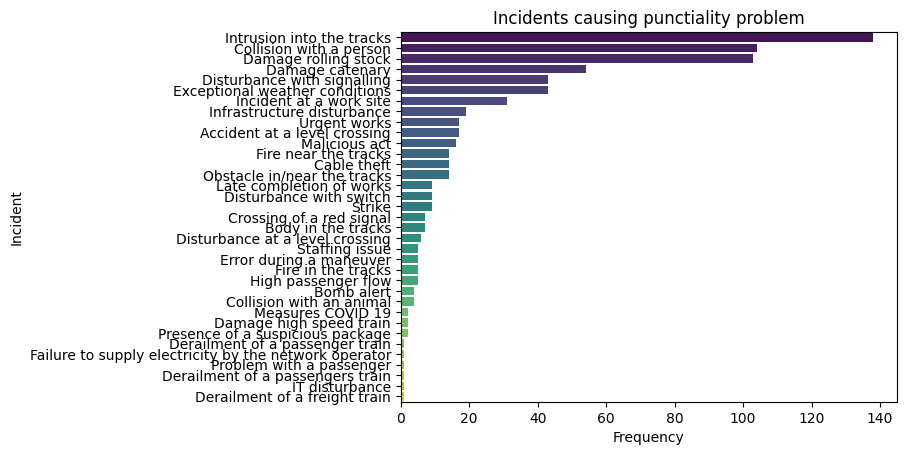

In [5]:
# Calculate the frequency of each modality
incident_counts = df_incident_impact_punc["Description de l'incident.2"].value_counts()
sns.barplot(x=incident_counts.values, y=incident_counts.index, hue=incident_counts.index, palette='viridis')
plt.title('Incidents causing punctiality problem')
plt.xlabel('Frequency')
plt.ylabel('Incident')
plt.show()

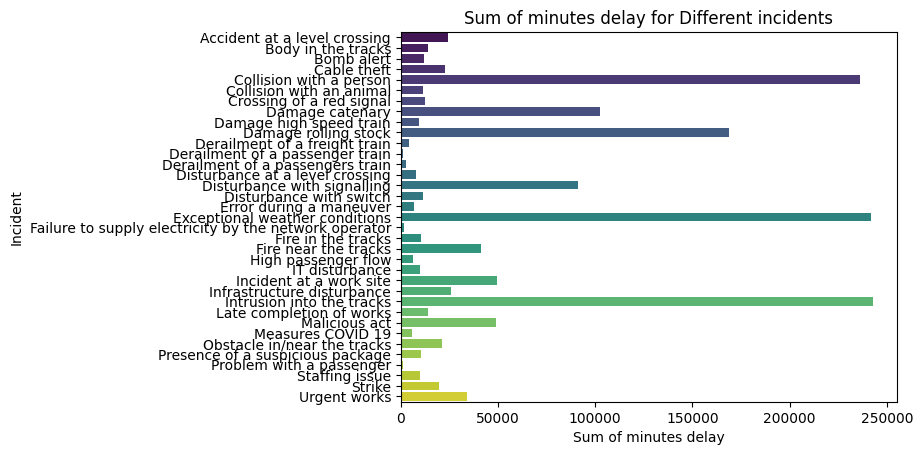

In [6]:
# =============================================================================
#  Plot the sum of minutes delay for the different incident category
# =============================================================================
delay_sums_by_incident = df_incident_impact_punc.groupby("Description de l'incident.2")["Nombre de minutes de retard"].sum().reset_index()
sns.barplot(x="Nombre de minutes de retard", y="Description de l'incident.2", hue = "Description de l'incident.2", data=delay_sums_by_incident, palette='viridis')
plt.title('Sum of minutes delay for Different incidents')
plt.xlabel('Sum of minutes delay')
plt.ylabel('Incident')
plt.show()

Text(0.5, 1.0, 'Box Plot delay per incident')

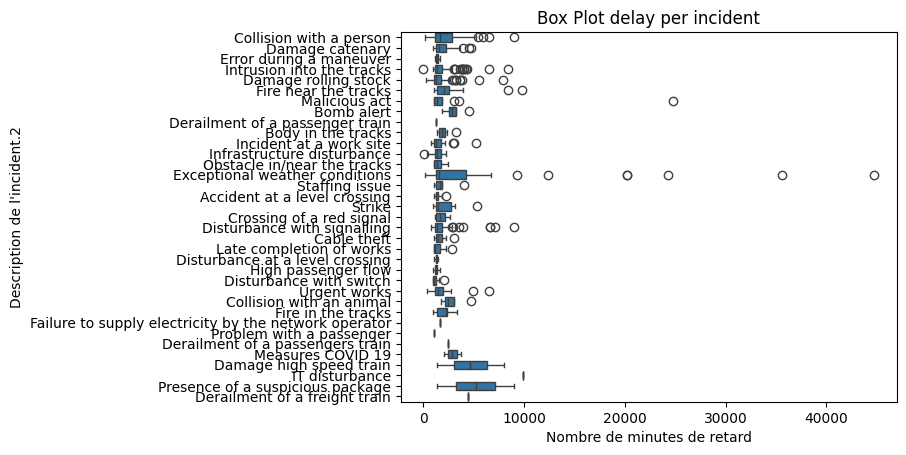

In [7]:
# Box Plot
sns.boxplot(x="Nombre de minutes de retard", y="Description de l'incident.2", data= df_incident_impact_punc)
plt.title('Box Plot delay per incident')

## Train punctuality per train and per moment

In [8]:
df_punc_per_train_type_moment

,Mois,Type de train,Instant,Instant.1,Instant.2,Ponctualité,Nombre de trains,Nombre de train avec moins de 6 min. de retard,Minutes de retard
0,2018-08,L,Daluren,Heures creuses,Off-peak hours,91.019489,16881,15365,30206.0
1,2018-08,P,Daluren,Heures creuses,Off-peak hours,88.188073,872,769,1828.0
2,2018-09,IC,Daluren,Heures creuses,Off-peak hours,82.853841,24227,20073,75986.0
3,2018-09,L,Daluren,Heures creuses,Off-peak hours,84.467266,15580,13160,41223.0
4,2018-09,S,Weekends,Weekends,Weekends,89.635454,4197,3762,8977.0
...,...,...,...,...,...,...,...,...,...
1446,2018-07,P,Avondspits,Pointe du soir,Evening peak hour,79.187817,1773,1404,6272.0
1447,2018-07,S,Weekends,Weekends,Weekends,94.789212,3819,3620,5014.0
1448,2018-08,IC,Ochtendspits,Pointe du matin,Morning peak hour,91.700337,5940,5447,10843.0
1449,2018-08,IC,Avondspits,Pointe du soir,Evening peak hour,86.178615,6584,5674,17671.0


## Importance of instant (peak hour or off-peak hours)

In [9]:
df_punc_train_bxl_per_moment_longline

,Mois,Ligne,Instant,Instant.1,Instant.2,Ponctualité,Nombre de trains comptabilisés,Nombre de trains arrivés à Bruxelles avec moins de 6 min. de retard,Minutes de retard
0,2018-11,162,Ochtendspits,Pointe du matin,Morning peak hour,65.853659,82,54,583
1,2018-11,162,Daluren,Heures creuses,Off-peak hours,85.763889,288,247,992
2,2018-12,25-27,Avondspits,Pointe du soir,Evening peak hour,86.063570,409,352,1235
3,2018-12,25-27,Daluren,Heures creuses,Off-peak hours,88.000000,1525,1342,3518
4,2018-12,36-36C,Avondspits,Pointe du soir,Evening peak hour,92.217899,771,711,1380
...,...,...,...,...,...,...,...,...,...
4402,2016-12,161,Daluren,Heures creuses,Off-peak hours,86.780105,764,663,2115
4403,2017-01,25-27,Ochtendspits,Pointe du matin,Morning peak hour,93.723849,478,448,830
4404,2017-01,25-27,Avondspits,Pointe du soir,Evening peak hour,90.909091,451,410,835
4405,2017-01,25-27,Weekends,Weekends,Weekends,95.967742,496,476,451


In [10]:
# Compute the number of train arrived with dealy
df_punc_train_bxl_per_moment_longline['Nombre_train_avec_retard'] = df_punc_train_bxl_per_moment_longline['Nombre de trains comptabilisés'] - df_punc_train_bxl_per_moment_longline['Nombre de trains arrivés à Bruxelles avec moins de 6 min. de retard']

In [11]:
df_punc_train_bxl_per_moment_longline

,Mois,Ligne,Instant,Instant.1,Instant.2,Ponctualité,Nombre de trains comptabilisés,Nombre de trains arrivés à Bruxelles avec moins de 6 min. de retard,Minutes de retard,Nombre_train_avec_retard
0,2018-11,162,Ochtendspits,Pointe du matin,Morning peak hour,65.853659,82,54,583,28
1,2018-11,162,Daluren,Heures creuses,Off-peak hours,85.763889,288,247,992,41
2,2018-12,25-27,Avondspits,Pointe du soir,Evening peak hour,86.063570,409,352,1235,57
3,2018-12,25-27,Daluren,Heures creuses,Off-peak hours,88.000000,1525,1342,3518,183
4,2018-12,36-36C,Avondspits,Pointe du soir,Evening peak hour,92.217899,771,711,1380,60
...,...,...,...,...,...,...,...,...,...,...
4402,2016-12,161,Daluren,Heures creuses,Off-peak hours,86.780105,764,663,2115,101
4403,2017-01,25-27,Ochtendspits,Pointe du matin,Morning peak hour,93.723849,478,448,830,30
4404,2017-01,25-27,Avondspits,Pointe du soir,Evening peak hour,90.909091,451,410,835,41
4405,2017-01,25-27,Weekends,Weekends,Weekends,95.967742,496,476,451,20


In [12]:
df_punc_train_group_instant = df_punc_train_bxl_per_moment_longline.groupby('Instant.2')['Nombre_train_avec_retard'].sum().reset_index()
df_punc_train_group_instant

,Instant.2,Nombre_train_avec_retard
0,Evening peak hour,36606
1,Morning peak hour,56532
2,Off-peak hours,104893
3,Weekends,34403


In [13]:
df_punc_train_bxl_per_moment_longline['pourcentage_train_avec_retard'] = 100.0 - df_punc_train_bxl_per_moment_longline['Ponctualité']
df_punc_train_bxl_per_moment_longline

,Mois,Ligne,Instant,Instant.1,Instant.2,Ponctualité,Nombre de trains comptabilisés,Nombre de trains arrivés à Bruxelles avec moins de 6 min. de retard,Minutes de retard,Nombre_train_avec_retard,pourcentage_train_avec_retard
0,2018-11,162,Ochtendspits,Pointe du matin,Morning peak hour,65.853659,82,54,583,28,34.146341
1,2018-11,162,Daluren,Heures creuses,Off-peak hours,85.763889,288,247,992,41,14.236111
2,2018-12,25-27,Avondspits,Pointe du soir,Evening peak hour,86.063570,409,352,1235,57,13.936430
3,2018-12,25-27,Daluren,Heures creuses,Off-peak hours,88.000000,1525,1342,3518,183,12.000000
4,2018-12,36-36C,Avondspits,Pointe du soir,Evening peak hour,92.217899,771,711,1380,60,7.782101
...,...,...,...,...,...,...,...,...,...,...,...
4402,2016-12,161,Daluren,Heures creuses,Off-peak hours,86.780105,764,663,2115,101,13.219895
4403,2017-01,25-27,Ochtendspits,Pointe du matin,Morning peak hour,93.723849,478,448,830,30,6.276151
4404,2017-01,25-27,Avondspits,Pointe du soir,Evening peak hour,90.909091,451,410,835,41,9.090909
4405,2017-01,25-27,Weekends,Weekends,Weekends,95.967742,496,476,451,20,4.032258


In [14]:
df_punc_train_group_instant = df_punc_train_bxl_per_moment_longline.groupby('Instant.2')['pourcentage_train_avec_retard'].mean().reset_index()
df_punc_train_group_instant = df_punc_train_group_instant.rename(columns = {'pourcentage_train_avec_retard': 'avg_percentage_trains_with_delay'})
df_punc_train_group_instant

,Instant.2,avg_percentage_trains_with_delay
0,Evening peak hour,12.353392
1,Morning peak hour,15.591211
2,Off-peak hours,9.065325
3,Weekends,6.693205


In [15]:
df_punc_train_group_instant = df_punc_train_bxl_per_moment_longline.groupby('Instant.2')['Minutes de retard'].sum().reset_index()
df_punc_train_group_instant

,Instant.2,Minutes de retard
0,Evening peak hour,781532
1,Morning peak hour,1062362
2,Off-peak hours,2337722
3,Weekends,779923


Text(0.5, 1.0, 'Box Plot delay per instant')

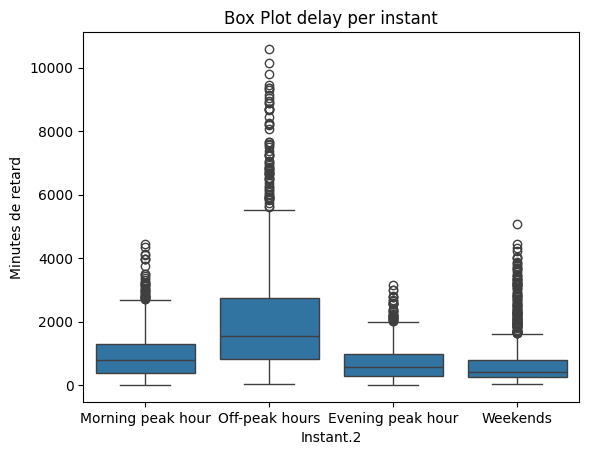

In [16]:
# Box Plot
sns.boxplot(x="Instant.2", y="Minutes de retard", data= df_punc_train_bxl_per_moment_longline)
plt.title('Box Plot delay per instant')

## Differents incidents causing the train delay

In [17]:
df_incident_impact_punc

,Mois,Date de l'incident,Ligne,Lieu,Lieu.1,Lieu.2,Description de l'incident,Description de l'incident.1,Description de l'incident.2,Nombre de minutes de retard,Nombre de trains supprimés
0,2024-05,2024-05-29,37,NESSONVAUX,NESSONVAUX,NESSONVAUX,Persoonsongeval,Heurt d'une personne,Collision with a person,1457,57
1,2024-05,2024-05-27,36N,KORTENBERG,KORTENBERG,KORTENBERG,Persoonsongeval,Heurt d'une personne,Collision with a person,4645,198
2,2024-05,2024-05-24,161/2,BRUSSEL-NOORD-ROOSTER F,BRUXELLES-NORD-ROOSTER F,BRUSSELS-NORTH-ROOSTER F,Schade bovenleiding,Avarie caténaire,Damage catenary,2591,170
3,2024-05,2024-05-24,53,MECHELEN,MECHELEN,MECHELEN,Fout tijdens een rangering,Erreur lors d'une manœuvre,Error during a maneuver,1691,62
4,2024-05,2024-05-23,0/3,BRUSSEL-CONGRES,BRUSSEL-CONGRES,BRUSSEL-CONGRES,Spoorlopers,Intrusion dans les voies,Intrusion into the tracks,1010,8
...,...,...,...,...,...,...,...,...,...,...,...
709,2019-01,2019-01-14,161/2,BRUSSEL-NOORD,BRUXELLES-NORD,BRUSSELS-NORTH,Storing seininrichting,Dérangement à la signalisation,Disturbance with signalling,1096,2
710,2019-01,2019-01-08,59,BELSELE,BELSELE,BELSELE,Schade treinmaterieel,Avarie matériel roulant,Damage rolling stock,1491,23
711,2019-01,2019-01-08,25,SINT-KATELIJNE-WAVER,SINT-KATELIJNE-WAVER,SINT-KATELIJNE-WAVER,Persoonsongeval,Heurt d'une personne,Collision with a person,3340,50
712,2019-01,2019-01-04,96,HALLE,HALLE,HALLE,Persoonsongeval,Heurt d'une personne,Collision with a person,2393,75


In [18]:
delay_sums_by_place = df_incident_impact_punc.groupby("Lieu.2")["Nombre de minutes de retard"].sum().reset_index()
delay_sums_by_place.sort_values(by="Nombre de minutes de retard", ascending=False)

,Lieu.2,Nombre de minutes de retard
0,-,212493
41,BRUSSELS-NORTH,85070
43,BRUSSELS-SOUTH,59902
40,BRUSSELS-CENTRAL,43396
81,GENT-SINT-PIETERS,40152
...,...,...
226,Y.MACHELEN-NOORD,1009
101,IZEGEM-SAS,1008
53,DE BIST,1007
39,BRUSSELS AIRPORT - ZAVENTEM,1006


Text(0.5, 1.0, 'Box Plot delay per place')

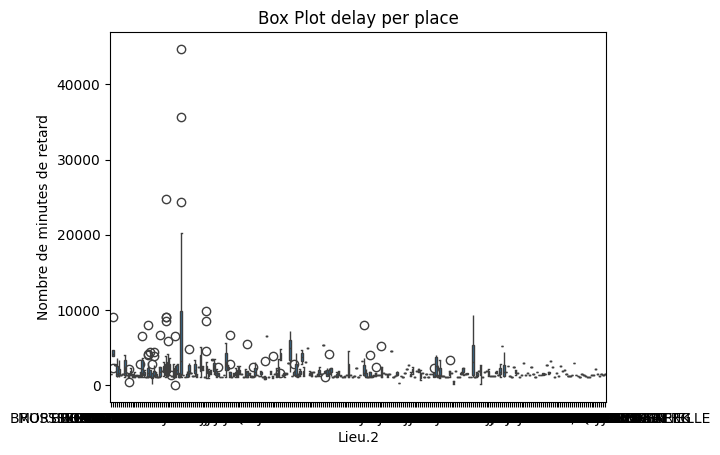

In [19]:
# Box Plot
sns.boxplot(x="Lieu.2", y="Nombre de minutes de retard", data= df_incident_impact_punc)
plt.title('Box Plot delay per place')

## Impact of the train type to the delay

In [20]:
df_punc_per_train_type_moment

,Mois,Type de train,Instant,Instant.1,Instant.2,Ponctualité,Nombre de trains,Nombre de train avec moins de 6 min. de retard,Minutes de retard
0,2018-08,L,Daluren,Heures creuses,Off-peak hours,91.019489,16881,15365,30206.0
1,2018-08,P,Daluren,Heures creuses,Off-peak hours,88.188073,872,769,1828.0
2,2018-09,IC,Daluren,Heures creuses,Off-peak hours,82.853841,24227,20073,75986.0
3,2018-09,L,Daluren,Heures creuses,Off-peak hours,84.467266,15580,13160,41223.0
4,2018-09,S,Weekends,Weekends,Weekends,89.635454,4197,3762,8977.0
...,...,...,...,...,...,...,...,...,...
1446,2018-07,P,Avondspits,Pointe du soir,Evening peak hour,79.187817,1773,1404,6272.0
1447,2018-07,S,Weekends,Weekends,Weekends,94.789212,3819,3620,5014.0
1448,2018-08,IC,Ochtendspits,Pointe du matin,Morning peak hour,91.700337,5940,5447,10843.0
1449,2018-08,IC,Avondspits,Pointe du soir,Evening peak hour,86.178615,6584,5674,17671.0


In [21]:
delay_sums_by_train_type = df_punc_per_train_type_moment.groupby("Type de train")["Minutes de retard"].sum().reset_index()
delay_sums_by_train_type.sort_values(by="Minutes de retard", ascending=False)

,Type de train,Minutes de retard
0,IC,11529481.0
3,L,7798389.0
4,P,1884462.0
5,S,1421377.0
1,ICT,21235.0
2,INT,18760.0


Text(0.5, 1.0, 'Box Plot train type')

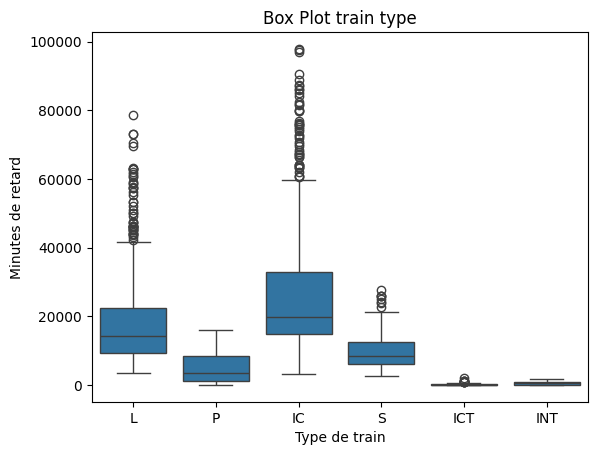

In [22]:
# Box Plot
sns.boxplot(x="Type de train", y="Minutes de retard", data= df_punc_per_train_type_moment)
plt.title('Box Plot train type')

## Study the possibility of merging different dataframes to have a complete dataframe

In [23]:
np.unique(df_incident_impact_punc['Ligne'])

array(['-', '0/1', '0/2', '0/3', '0/4', '0/5', '1', '10/1', '112', '116',
       '118', '12', '124', '124A', '125', '130', '139', '15', '154',
       '161', '161/2', '161A', '162', '2', '21', '21/1', '21A', '25',
       '25N', '26', '26/4', '27', '27A', '27M/2', '28L/1', '29', '34',
       '35', '35/1', '35L/3', '36', '36C', '36C/2', '36N', '37', '37A',
       '4', '40', '42', '49', '50', '50A', '50A/3', '50A/4', '50C', '50D',
       '52', '53', '53A', '54', '58', '59', '59/1', '59B', '60', '66',
       '73', '75', '78', '86', '89', '94', '96', '96B', '96E', '96L/2',
       '96N', '97'], dtype=object)

In [24]:
np.unique(df_punc_train_bxl_per_moment_longline['Ligne'])

array(['124', '161', '162', '25-27', '36-36C', '50', '50A', '60', '89',
       '94', '96'], dtype=object)

In [25]:
df_punc_train_bxl_per_moment_longline[df_punc_train_bxl_per_moment_longline['Ligne'] == '94']

,Mois,Ligne,Instant,Instant.1,Instant.2,Ponctualité,Nombre de trains comptabilisés,Nombre de trains arrivés à Bruxelles avec moins de 6 min. de retard,Minutes de retard,Nombre_train_avec_retard,pourcentage_train_avec_retard
22,2019-01,94,Ochtendspits,Pointe du matin,Morning peak hour,71.290323,310,221,1246,89,28.709677
23,2019-01,94,Avondspits,Pointe du soir,Evening peak hour,81.182796,186,151,543,35,18.817204
43,2019-02,94,Ochtendspits,Pointe du matin,Morning peak hour,73.454545,275,202,1167,73,26.545455
44,2019-02,94,Avondspits,Pointe du soir,Evening peak hour,83.815029,173,145,539,28,16.184971
56,2019-03,94,Ochtendspits,Pointe du matin,Morning peak hour,79.804560,307,245,1168,62,20.195440
...,...,...,...,...,...,...,...,...,...,...,...
4383,2016-11,94,Ochtendspits,Pointe du matin,Morning peak hour,48.897059,272,133,2105,139,51.102941
4384,2016-11,94,Daluren,Heures creuses,Off-peak hours,82.890365,602,499,1765,103,17.109635
4396,2016-12,94,Ochtendspits,Pointe du matin,Morning peak hour,75.684932,292,221,1113,71,24.315068
4397,2016-12,94,Weekends,Weekends,Weekends,97.767857,224,219,159,5,2.232143


In [26]:
df_incident_impact_punc[df_incident_impact_punc['Ligne'] == '94']

,Mois,Date de l'incident,Ligne,Lieu,Lieu.1,Lieu.2,Description de l'incident,Description de l'incident.1,Description de l'incident.2,Nombre de minutes de retard,Nombre de trains supprimés
15,2024-04,2024-04-02,94,SAINTES,SAINTES,SAINTES,Persoonsongeval,Heurt d'une personne,Collision with a person,1277,60
165,2023-04,2023-04-06,94,SAINTES,SAINTES,SAINTES,Persoonsongeval,Heurt d'une personne,Collision with a person,1191,42
171,2023-03,2023-03-29,94,SAINTES,SAINTES,SAINTES,Schade treinmaterieel,Avarie matériel roulant,Damage rolling stock,1198,28
184,2023-02,2023-02-17,94,Y.SILLY,Y.SILLY,Y.SILLY,Dringende werken,Travaux urgents,Urgent works,4991,110
191,2023-02,2023-02-10,94,EDINGEN,EDINGEN,EDINGEN,Dringende werken,Travaux urgents,Urgent works,1419,0
199,2023-02,2023-02-02,94,LEUZE,LEUZE,LEUZE,Ongeval aan een overweg,Accident à un passage à niveau,Accident at a level crossing,2247,68
228,2022-12,2022-12-13,94,TOURNAI,TOURNAI,TOURNAI,Spoorlopers,Intrusion dans les voies,Intrusion into the tracks,1313,28
275,2022-09,2022-09-22,94,ATH,ATH,ATH,Incident tijdens een werf,Incident pendant un chantier,Incident at a work site,1047,22
279,2022-09,2022-09-16,94,SAINTES,SAINTES,SAINTES,Aanrijding van een dier,Heurt d'animal,Collision with an animal,1783,56
283,2022-09,2022-09-09,94,EDINGEN,EDINGEN,EDINGEN,Fout tijdens een rangering,Erreur lors d'une manœuvre,Error during a maneuver,1258,44


In [27]:
df_punc_per_train_type_moment

,Mois,Type de train,Instant,Instant.1,Instant.2,Ponctualité,Nombre de trains,Nombre de train avec moins de 6 min. de retard,Minutes de retard
0,2018-08,L,Daluren,Heures creuses,Off-peak hours,91.019489,16881,15365,30206.0
1,2018-08,P,Daluren,Heures creuses,Off-peak hours,88.188073,872,769,1828.0
2,2018-09,IC,Daluren,Heures creuses,Off-peak hours,82.853841,24227,20073,75986.0
3,2018-09,L,Daluren,Heures creuses,Off-peak hours,84.467266,15580,13160,41223.0
4,2018-09,S,Weekends,Weekends,Weekends,89.635454,4197,3762,8977.0
...,...,...,...,...,...,...,...,...,...
1446,2018-07,P,Avondspits,Pointe du soir,Evening peak hour,79.187817,1773,1404,6272.0
1447,2018-07,S,Weekends,Weekends,Weekends,94.789212,3819,3620,5014.0
1448,2018-08,IC,Ochtendspits,Pointe du matin,Morning peak hour,91.700337,5940,5447,10843.0
1449,2018-08,IC,Avondspits,Pointe du soir,Evening peak hour,86.178615,6584,5674,17671.0


In [28]:
df_incident_impact_punc

,Mois,Date de l'incident,Ligne,Lieu,Lieu.1,Lieu.2,Description de l'incident,Description de l'incident.1,Description de l'incident.2,Nombre de minutes de retard,Nombre de trains supprimés
0,2024-05,2024-05-29,37,NESSONVAUX,NESSONVAUX,NESSONVAUX,Persoonsongeval,Heurt d'une personne,Collision with a person,1457,57
1,2024-05,2024-05-27,36N,KORTENBERG,KORTENBERG,KORTENBERG,Persoonsongeval,Heurt d'une personne,Collision with a person,4645,198
2,2024-05,2024-05-24,161/2,BRUSSEL-NOORD-ROOSTER F,BRUXELLES-NORD-ROOSTER F,BRUSSELS-NORTH-ROOSTER F,Schade bovenleiding,Avarie caténaire,Damage catenary,2591,170
3,2024-05,2024-05-24,53,MECHELEN,MECHELEN,MECHELEN,Fout tijdens een rangering,Erreur lors d'une manœuvre,Error during a maneuver,1691,62
4,2024-05,2024-05-23,0/3,BRUSSEL-CONGRES,BRUSSEL-CONGRES,BRUSSEL-CONGRES,Spoorlopers,Intrusion dans les voies,Intrusion into the tracks,1010,8
...,...,...,...,...,...,...,...,...,...,...,...
709,2019-01,2019-01-14,161/2,BRUSSEL-NOORD,BRUXELLES-NORD,BRUSSELS-NORTH,Storing seininrichting,Dérangement à la signalisation,Disturbance with signalling,1096,2
710,2019-01,2019-01-08,59,BELSELE,BELSELE,BELSELE,Schade treinmaterieel,Avarie matériel roulant,Damage rolling stock,1491,23
711,2019-01,2019-01-08,25,SINT-KATELIJNE-WAVER,SINT-KATELIJNE-WAVER,SINT-KATELIJNE-WAVER,Persoonsongeval,Heurt d'une personne,Collision with a person,3340,50
712,2019-01,2019-01-04,96,HALLE,HALLE,HALLE,Persoonsongeval,Heurt d'une personne,Collision with a person,2393,75


In [29]:
df_punc_train_bxl_per_moment_longline

,Mois,Ligne,Instant,Instant.1,Instant.2,Ponctualité,Nombre de trains comptabilisés,Nombre de trains arrivés à Bruxelles avec moins de 6 min. de retard,Minutes de retard,Nombre_train_avec_retard,pourcentage_train_avec_retard
0,2018-11,162,Ochtendspits,Pointe du matin,Morning peak hour,65.853659,82,54,583,28,34.146341
1,2018-11,162,Daluren,Heures creuses,Off-peak hours,85.763889,288,247,992,41,14.236111
2,2018-12,25-27,Avondspits,Pointe du soir,Evening peak hour,86.063570,409,352,1235,57,13.936430
3,2018-12,25-27,Daluren,Heures creuses,Off-peak hours,88.000000,1525,1342,3518,183,12.000000
4,2018-12,36-36C,Avondspits,Pointe du soir,Evening peak hour,92.217899,771,711,1380,60,7.782101
...,...,...,...,...,...,...,...,...,...,...,...
4402,2016-12,161,Daluren,Heures creuses,Off-peak hours,86.780105,764,663,2115,101,13.219895
4403,2017-01,25-27,Ochtendspits,Pointe du matin,Morning peak hour,93.723849,478,448,830,30,6.276151
4404,2017-01,25-27,Avondspits,Pointe du soir,Evening peak hour,90.909091,451,410,835,41,9.090909
4405,2017-01,25-27,Weekends,Weekends,Weekends,95.967742,496,476,451,20,4.032258


In [30]:
np.unique(df_incident_impact_punc['Ligne'])

array(['-', '0/1', '0/2', '0/3', '0/4', '0/5', '1', '10/1', '112', '116',
       '118', '12', '124', '124A', '125', '130', '139', '15', '154',
       '161', '161/2', '161A', '162', '2', '21', '21/1', '21A', '25',
       '25N', '26', '26/4', '27', '27A', '27M/2', '28L/1', '29', '34',
       '35', '35/1', '35L/3', '36', '36C', '36C/2', '36N', '37', '37A',
       '4', '40', '42', '49', '50', '50A', '50A/3', '50A/4', '50C', '50D',
       '52', '53', '53A', '54', '58', '59', '59/1', '59B', '60', '66',
       '73', '75', '78', '86', '89', '94', '96', '96B', '96E', '96L/2',
       '96N', '97'], dtype=object)

In [31]:
np.unique(df_punc_train_bxl_per_moment_longline['Ligne'])

array(['124', '161', '162', '25-27', '36-36C', '50', '50A', '60', '89',
       '94', '96'], dtype=object)